<a href="https://colab.research.google.com/github/ChetnaPawar/Salery_prediction/blob/master/salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv')
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
# Separate features and target variable
numerical_features = ['Age','Years of Experience','Salary']
categorical_features = ['Gender','Education Level','Job Title']

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
print(X)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [30.0 'Female' "Bachelor's Degree" 'Financial Manager' 4.0]
 [46.0 'Male' "Master's Degree" 'Marketing Manager' 14.0]
 [26.0 'Female' 'High School' 'Sales Executive' 1.0]]


In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(X[:,0:1])
imputer.fit_transform(X[:,4:5])

array([[ 5.],
       [ 3.],
       [15.],
       ...,
       [ 4.],
       [14.],
       [ 1.]])

In [7]:
print(X)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [30.0 'Female' "Bachelor's Degree" 'Financial Manager' 4.0]
 [46.0 'Male' "Master's Degree" 'Marketing Manager' 14.0]
 [26.0 'Female' 'High School' 'Sales Executive' 1.0]]


In [8]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
x_transformer = ct.fit_transform(X)

In [14]:
print(x_transformer)

  (0, 1)	1.0
  (0, 4)	1.0
  (0, 189)	1.0
  (0, 206)	32.0
  (0, 207)	5.0
  (1, 0)	1.0
  (1, 7)	1.0
  (1, 30)	1.0
  (1, 206)	28.0
  (1, 207)	3.0
  (2, 1)	1.0
  (2, 9)	1.0
  (2, 157)	1.0
  (2, 206)	45.0
  (2, 207)	15.0
  (3, 0)	1.0
  (3, 4)	1.0
  (3, 128)	1.0
  (3, 206)	36.0
  (3, 207)	7.0
  (4, 1)	1.0
  (4, 7)	1.0
  (4, 38)	1.0
  (4, 206)	52.0
  (4, 207)	20.0
  :	:
  (6699, 0)	1.0
  (6699, 9)	1.0
  (6699, 46)	1.0
  (6699, 206)	49.0
  (6699, 207)	20.0
  (6700, 1)	1.0
  (6700, 6)	1.0
  (6700, 128)	1.0
  (6700, 206)	32.0
  (6700, 207)	3.0
  (6701, 0)	1.0
  (6701, 5)	1.0
  (6701, 54)	1.0
  (6701, 206)	30.0
  (6701, 207)	4.0
  (6702, 1)	1.0
  (6702, 8)	1.0
  (6702, 109)	1.0
  (6702, 206)	46.0
  (6702, 207)	14.0
  (6703, 0)	1.0
  (6703, 6)	1.0
  (6703, 130)	1.0
  (6703, 206)	26.0
  (6703, 207)	1.0


In [15]:
print(y)

[ 90000.  65000. 150000. ...  55000. 140000.  35000.]


In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y.reshape(-1, 1)
imputer.fit_transform(y)
y = y.ravel()
imputer.fit_transform(x_transformer)

<6704x208 sparse matrix of type '<class 'numpy.float64'>'
	with 33400 stored elements in Compressed Sparse Column format>

In [17]:
print(y)

[ 90000.  65000. 150000. ...  55000. 140000.  35000.]


In [38]:
x_train,x_test,y_train,y_test= train_test_split(x_transformer,y,test_size=0.2,random_state=1)

In [39]:
print(y_train)
print(x_train)

[178684. 140000. 120000. ...  85000.  45000.  50000.]
  (0, 0)	1.0
  (0, 9)	1.0
  (0, 190)	1.0
  (0, 206)	49.0
  (0, 207)	22.0
  (1, 1)	1.0
  (1, 4)	1.0
  (1, 189)	1.0
  (1, 206)	27.0
  (1, 207)	4.0
  (2, 1)	1.0
  (2, 5)	1.0
  (2, 122)	1.0
  (2, 206)	32.0
  (2, 207)	8.0
  (3, 1)	1.0
  (3, 8)	1.0
  (3, 57)	1.0
  (3, 206)	28.0
  (3, 207)	4.0
  (4, 0)	1.0
  (4, 9)	1.0
  (4, 32)	1.0
  (4, 206)	30.0
  (4, 207)	7.0
  :	:
  (5358, 0)	1.0
  (5358, 4)	1.0
  (5358, 189)	1.0
  (5358, 206)	28.0
  (5358, 207)	5.0
  (5359, 1)	1.0
  (5359, 9)	1.0
  (5359, 32)	1.0
  (5359, 206)	32.0
  (5359, 207)	9.0
  (5360, 1)	1.0
  (5360, 5)	1.0
  (5360, 115)	1.0
  (5360, 206)	33.0
  (5360, 207)	7.0
  (5361, 1)	1.0
  (5361, 4)	1.0
  (5361, 96)	1.0
  (5361, 206)	32.0
  (5361, 207)	3.0
  (5362, 0)	1.0
  (5362, 5)	1.0
  (5362, 58)	1.0
  (5362, 206)	27.0
  (5362, 207)	2.0


In [40]:
y_train = y_train.reshape(-1,1)
imputer.fit_transform(y_train)
y_train = imputer.transform(y_train)
y_train = y_train.ravel()
x_train = imputer.fit_transform(x_train)

In [41]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
y_pred = regressor.predict(x_test)
print(y_pred)

[134000.    43000.   200000.   ...  38500.    50000.   179950.54]


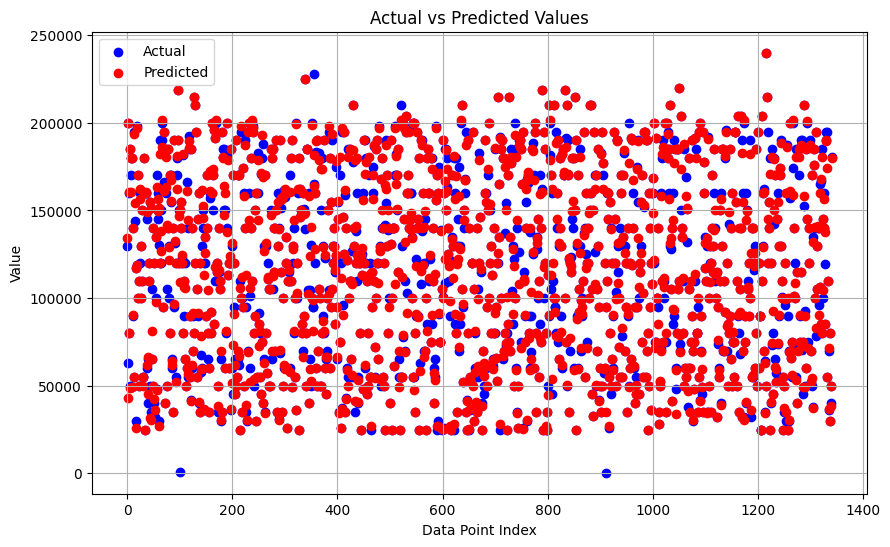

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_teset,color='blue', label='Actual')  # Corrected variable name
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Calculate and print accuracy metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print(f"Mean Absolute Error (MAE):" , mae)
print(f"R-squared (R2):", r2)

Mean Squared Error (MSE): 48304532.967765756
Mean Absolute Error (MAE): 2573.257165132164
R-squared (R2): 0.983026988711508
